<a href="https://colab.research.google.com/github/luisdiaz1997/DataScienceCourse/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


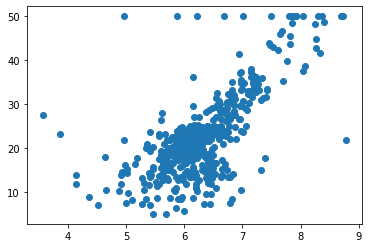

In [4]:
plt.scatter(df.RM, df.MEDV)

In [0]:
x_val = df.RM.values.reshape(1, -1)
y_val = df.MEDV.values.reshape(1, -1)

In [0]:
x = tf.placeholder(dtype= tf.float32, shape = [1, None])
y= tf.placeholder(dtype= tf.float32, shape = [1, None])

In [7]:
w = tf.get_variable("w", [1, x.shape[0]], initializer = tf.contrib.layers.xavier_initializer(seed=10))
b = tf.get_variable('b', [1, 1], initializer = tf.zeros_initializer())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
def operate(x, w, b):
  op = tf.matmul(w, x) + b
  return op

In [0]:
model = operate(x, w, b)

In [0]:
def predict(x, w, b):
  p = operate(x, w, b)
  init = tf.global_variables_initializer()
  with tf.Session() as session:
    session.run(init)
    result = session.run(p, feed_dict={x: x_val, y:y_val})
  return result

In [0]:
result = predict(x, w, b)

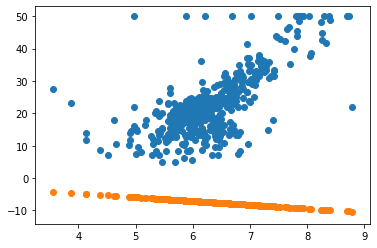

In [12]:
plt.scatter(x_val, y_val)
plt.scatter(x_val, result)

In [0]:
cost = tf.reduce_mean((model-y)**2)

In [14]:
optimizer = tf.train.MomentumOptimizer(learning_rate = 0.01, momentum=0.9).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
init=tf.global_variables_initializer()

In [16]:
with tf.Session() as session:
    session.run(init)
    errors = list()
    for i in range(3000):
      error, _ = session.run([cost, optimizer], feed_dict={x: x_val, y:y_val})
      errors.append(error)
      if i%100 == 0:
        print('epoch ' + str(i), error)
    
    parameters = session.run([w, b])

epoch 0 993.66943
epoch 100 53.511524
epoch 200 49.64259
epoch 300 47.292957
epoch 400 45.85705
epoch 500 44.979538
epoch 600 44.44328
epoch 700 44.115562
epoch 800 43.915287
epoch 900 43.792892
epoch 1000 43.718098
epoch 1100 43.672386
epoch 1200 43.64445
epoch 1300 43.62738
epoch 1400 43.616947
epoch 1500 43.610573
epoch 1600 43.606678
epoch 1700 43.60429
epoch 1800 43.60284
epoch 1900 43.60195
epoch 2000 43.60141
epoch 2100 43.601078
epoch 2200 43.600872
epoch 2300 43.600746
epoch 2400 43.60067
epoch 2500 43.600624
epoch 2600 43.600597
epoch 2700 43.600582
epoch 2800 43.60057
epoch 2900 43.600563


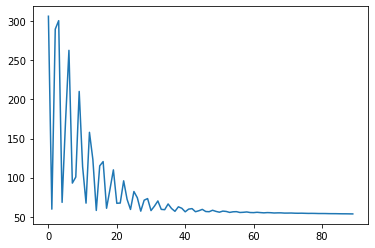

In [17]:
plt.plot(errors[10:100]);

In [0]:
result = predict(x, *parameters)

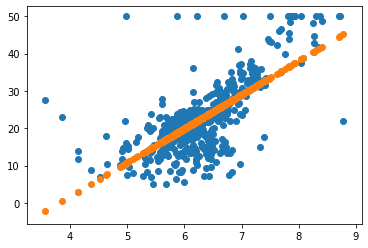

In [19]:
plt.scatter(x_val, y_val)
plt.scatter(x_val, result);